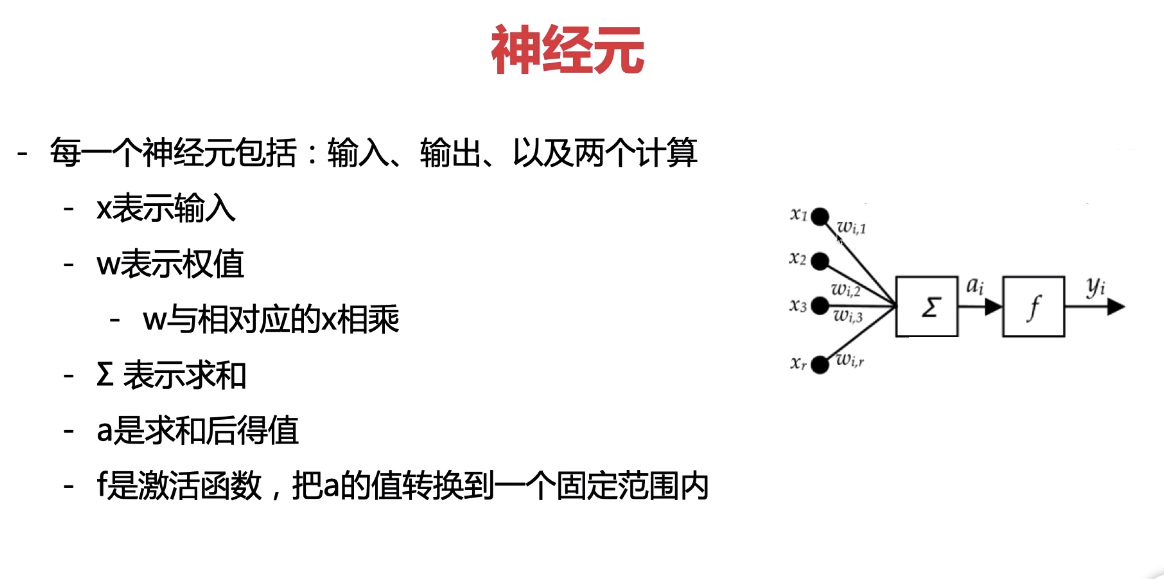

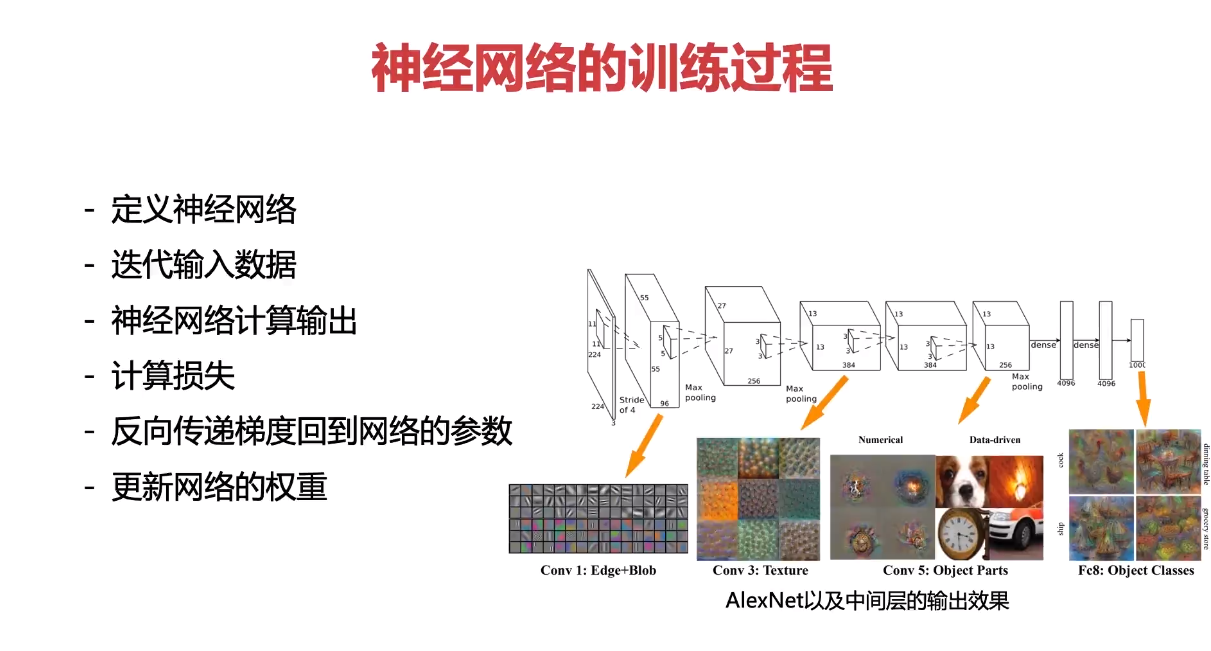

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Net(nn.Module):
    def __init__(self): #定义神经网络结构，输入数据 1x32x32
        super(Net, self).__init__()
        # 第一层（卷积层）
        self.conv1 = nn.Conv2d(1,6,3) #(conv2d：定义2维度卷积神经网络函数)
                                      #输入频道1，输出频道6，卷积3x3
        # 第二层（卷积层）
        self.conv2 = nn.Conv2d(6,16,3)#输入频道6，输出频道16，卷积3x3
        # 第三层（全连接层）
        self.fc1 = nn.Linear(16*28*28,512) #输入维度16*28*28=12544,输出维度512
        # 第四层（全连接层）
        self.fc2 = nn.Linear(512,64) #输入维度512，输出维度64
        # 第五层（全连接层）
        self.fc3 = nn.Linear(64,2) #输入维度64，输出维度2
        
    def forward(self,x):  # 定义数据流向
        x = self.conv1(x)
        x = F.relu(x)  # 激活函数
        
        x = self.conv2(x)
        x = F.relu(x)  # 激活函数
        
        x = x.view(-1, 16*28*28) # 全连接层fc1的输入数据为 1x12544 形式
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        x = F.relu(x)
        
        x = self.fc3(x)
        
        return x

In [4]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=12544, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)


In [5]:
# 生成随机输入

input_data = torch.randn(1,1,32,32)  
print(input_data)
print(input_data.size())

tensor([[[[-0.3012,  0.6475, -0.9615,  ...,  0.1665,  0.8761,  0.8049],
          [ 0.7583, -2.1476, -0.2269,  ...,  0.0457, -1.5505,  0.0418],
          [-0.1234, -0.9408, -1.7081,  ...,  0.9788,  0.2806, -0.8156],
          ...,
          [-0.1238,  0.2505, -0.0329,  ..., -0.7861, -0.5541,  1.0244],
          [ 0.0642,  1.4850, -0.8050,  ..., -0.2172,  0.2204, -0.4131],
          [ 0.3011, -0.9472,  0.7514,  ...,  0.4878, -0.4233,  2.4397]]]])
torch.Size([1, 1, 32, 32])


In [6]:
# 运行神经网络

out = net(input_data)
print(out)
print(out.size())

tensor([[0.0334, 0.0402]], grad_fn=<AddmmBackward>)
torch.Size([1, 2])


In [7]:
#  随机生成真实值
target = torch.randn(2)
target = target.view(1,-1)
print(target)

tensor([[ 1.7129, -0.6118]])


In [8]:
criterion = nn.L1Loss() #损失值的绝对值的平均数, 损失函数
loss = criterion(out, target)
print(loss)

tensor(1.1657, grad_fn=<L1LossBackward>)


In [13]:
# 反向传递
net.zero_grad() #清零梯度
loss.backward() #自动计算梯度，反向传递

In [14]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(),lr=0.01)
optimizer.step()

In [15]:
out = net(input_data)
print(out)
print(out.size())

tensor([[0.0823, 0.0034]], grad_fn=<AddmmBackward>)
torch.Size([1, 2])


In [16]:
loss = criterion(out, target)
print(loss)

tensor(1.1229, grad_fn=<L1LossBackward>)
